In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
uploaded = files.upload()

Saving Visakhapatnam_2019.csv to Visakhapatnam_2019.csv


In [2]:
df=pd.read_csv(io.BytesIO(uploaded['Visakhapatnam_2019.csv']))
df.head() #displays first 5 elements

,Station,Timestamp,Radar Sensor (cm),Radar Sensor Height (m),Unnamed: 4,Unnamed: 5
0,Visakhapatnam,1/1/2019 0:00,119.68,1.1968,0.0,119.21
1,Visakhapatnam,1/1/2019 0:01,118.86,1.1886,0.0,118.30
2,Visakhapatnam,1/1/2019 0:02,118.91,1.1891,0.0,118.33
3,Visakhapatnam,1/1/2019 0:03,118.79,1.1879,0.0,118.39
4,Visakhapatnam,1/1/2019 0:04,118.23,1.1823,0.0,117.67


In [3]:
r_s=df['Radar Sensor Height (m)']
r_s

0         1.1968
1         1.1886
2         1.1891
3         1.1879
4         1.1823
           ...  
441574    0.2749
441575    0.2680
441576    0.2677
441577    0.2786
441578    0.2740
Name: Radar Sensor Height (m), Length: 441579, dtype: float64

In [4]:
#for 3 months--91173
date=df.iloc[:91173,1]
date

0          1/1/2019 0:00
1          1/1/2019 0:01
2          1/1/2019 0:02
3          1/1/2019 0:03
4          1/1/2019 0:04
              ...       
91168    3/31/2019 23:55
91169    3/31/2019 23:56
91170    3/31/2019 23:57
91171    3/31/2019 23:58
91172    3/31/2019 23:59
Name: Timestamp, Length: 91173, dtype: object

In [5]:
date1=df.iloc[:91173,3]
date1

0        1.1968
1        1.1886
2        1.1891
3        1.1879
4        1.1823
          ...  
91168    0.8602
91169    0.8578
91170    0.8700
91171    0.8656
91172    0.8544
Name: Radar Sensor Height (m), Length: 91173, dtype: float64

In [6]:
X_train=r_s[0:91173]
Y_train=r_s[1:91174]
Y_train

1        1.1886
2        1.1891
3        1.1879
4        1.1823
5        1.1831
          ...  
91169    0.8578
91170    0.8700
91171    0.8656
91172    0.8544
91173    0.8577
Name: Radar Sensor Height (m), Length: 91173, dtype: float64

In [7]:
X_train=np.reshape(np.array(X_train),(91173,1,1))
Y_train=np.reshape(np.array(Y_train),(91174,1,1))

ValueError: ignored

In [8]:
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [10]:
reg=Sequential()
reg.add(LSTM(units=4,activation='relu',input_shape=(None,1)))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,Y_train,batch_size=10,epochs=25)

Epoch 1/25
9118/9118 [==============================] - 37s 4ms/step - loss: 0.2146
Epoch 2/25
9118/9118 [==============================] - 37s 4ms/step - loss: 0.1046
Epoch 3/25
9118/9118 [==============================] - 35s 4ms/step - loss: 0.1124
Epoch 4/25
9118/9118 [==============================] - 37s 4ms/step - loss: 0.1412
Epoch 5/25
9118/9118 [==============================] - 36s 4ms/step - loss: 0.1285
Epoch 6/25
9118/9118 [==============================] - 36s 4ms/step - loss: 0.1526
Epoch 7/25
9118/9118 [==============================] - 36s 4ms/step - loss: 0.1199
Epoch 8/25
9118/9118 [==============================] - 37s 4ms/step - loss: 0.1387
Epoch 9/25
9118/9118 [==============================] - 36s 4ms/step - loss: 0.1219
Epoch 10/25
9118/9118 [==============================] - 37s 4ms/step - loss: 0.1105
Epoch 11/25
9118/9118 [==============================] - 35s 4ms/step - loss: 0.1203
Epoch 12/25
9118/9118 [==============================] - 37s 4ms/step - lo

In [11]:
uploaded1 = files.upload()
dg=pd.read_csv(io.BytesIO(uploaded['Visakhapatnam_2019.csv']))


Saving Visakhapatnam_2019.csv to Visakhapatnam_2019 (1).csv


In [49]:
#test with 4 month
dg.iloc[91173:130320,3]

91173     0.8577
91174     0.8698
91175     0.8767
91176     0.8756
91177     0.8778
           ...  
130315    1.1789
130316    1.1790
130317    1.0932
130318    1.1985
130319    1.1004
Name: Radar Sensor Height (m), Length: 39147, dtype: float64

In [50]:
dg1=dg.iloc[91173:130320,3].values
dg1=np.reshape(dg1,(39147,1,1))
dg1

array([[[0.8577]],

       [[0.8698]],

       [[0.8767]],

       ...,

       [[1.0932]],

       [[1.1985]],

       [[1.1004]]])

In [51]:
reg.predict(dg1)

array([[0.8620314],
       [0.8743425],
       [0.8813577],
       ...,
       [1.0990876],
       [1.2028912],
       [1.1062346]], dtype=float32)

In [54]:
dg2=dg.iloc[91173:130320,3].values

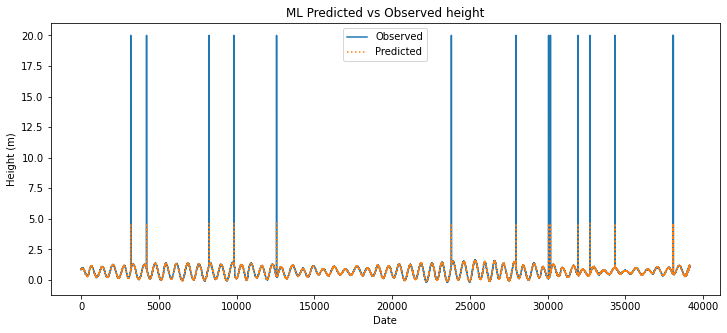

In [55]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(0,39147),dg2,label='Observed')
plt.plot(np.arange(0,39147),reg.predict(dg1),label='Predicted',linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Height (m)')
plt.title('ML Predicted vs Observed height')
plt.legend()

In [56]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',np.sqrt(mean_squared_error(dg2,reg.predict(dg1))))

RMSE:  0.37283470253255324
